In [111]:
import numpy as np
import matplotlib.pyplot as plt
import subprocess
import sys
import os

In [39]:
def perform_rust_computation(parameter_file: str):
    command = f"cargo run --release -- {parameter_file}"
    
    print(f"Command: \"{command}\"")   
    with subprocess.Popen(command, stdout=subprocess.PIPE, bufsize=1, universal_newlines=True) as stream:
        for line in stream.stdout:
            print(line, end='') 
    
        stdout, stderr = stream.communicate()
        if stream.returncode != 0:
            print(stdout)
            print(stderr)
        else:
            print("=> execution successful.")
    print("")

In [40]:
def array_to_str(array: np.ndarray, rounding):
    temps_str = []
    for val in array:
        temps_str.append(str(round(val,rounding)))
    return ", ".join(temps_str)

def write_parameter_file(param_file, out_file, rows, cols, therm_steps, measure_steps, temperatures, rounding = 3):
    with open(param_file, "w") as f:
        f.write(f"rows: {rows}\n")
        f.write(f"cols: {cols}\n")
        f.write(f"therm_steps: {therm_steps}\n")
        f.write(f"measure_steps: {measure_steps}\n")
        f.write(f"temperatures: {array_to_str(temperatures, rounding)}\n")
        f.write(f"outputfile: {out_file}\n")

In [41]:
class RustMonteCarloData:
    def __init__(self, file_name):
        self.file_name = file_name
        self.temperatures       = []
        self.energy_density     = []
        self.magnetisation      = []
        self.specific_heat      = []
        self.mag_susceptibility = []
        self.elapsed_time       = -1
        self.observables        = []
        self.compute_observables()
        
    def to_nd_array(self, name):
        my_lists = getattr(self, name)
        
        if not isinstance(my_lists, np.ndarray):            
            setattr(self, name, np.asarray(my_lists))

    def all_lists_to_array(self):
        for name in vars(self).keys():
            if name != "elapsed_time":
                self.to_nd_array(name)

    def compute_observables(self):
        with open(self.file_name, "r") as file:
            for (n, lines) in enumerate(file):
                if n == 0:
                    slines = lines.split(':')
                    try:
                        self.observables  = slines[0].split(', ')
                        self.elapsed_time = float(slines[1])
                    except Exception as _:
                        self.observables = lines.split(',')
                        print("No elasped time found.")
                else:
                    slines = lines.split(", ")
                    self.temperatures.append(float(slines[0]))
                    self.energy_density.append(float(slines[1]))
                    self.magnetisation.append(float(slines[2]))
                    self.specific_heat.append(float(slines[3]))
                    self.mag_susceptibility.append(float(slines[4]))
        
        self.all_lists_to_array()

## Perform Monte-Carlo calculation:

Overview!!

In [47]:
try: 
    os.mkdir("results/overview")
except Exception as e:
    print(f"Cannot create dir: {e}")

Cannot create dir: [WinError 183] Cannot create a file when that file already exists: 'results/overview'


In [102]:
temperatures         = np.arange(1, 3, 0.05)
lengths              = [8, 16, 32, 64, 128]
thermalisation_steps = dict()
measurement_steps    = dict()

param_files = dict()
out_files   = dict()

for L in lengths:
    if L <= 64:
        thermalisation_steps[L] = np.uint(5e5)
        measurement_steps[L]    = np.uint(5e5)
    else:
        thermalisation_steps[L] = np.uint(1e5)
        measurement_steps[L]    = np.uint(1e5)
    
    delim = "/"
    if sys.platform == "win32":
        delim = "\\"
        
    param_files[L] = f"results{delim}overview{delim}parameter_{L}x{L}.txt"
    out_files[L]   = f"results/overview/out_{L}x{L}.txt"
        
    write_parameter_file(param_files[L], out_files[L], L, L, thermalisation_steps[L], measurement_steps[L], temperatures)

In [103]:
for L in lengths:
    if L != 128:
        perform_rust_computation(param_files[L])

Command: "cargo run --release -- results\overview\parameter_8x8.txt"
Launching Swendsen-Wang simulation for N:8x8 with therm steps 500000 & measure_steps: 500000
Using: 40 temperatures values from 1 to 2.95
Time taken: 41s
File saved as results/overview/out_8x8.txt
=> execution successful.

Command: "cargo run --release -- results\overview\parameter_16x16.txt"
Launching Swendsen-Wang simulation for N:16x16 with therm steps 500000 & measure_steps: 500000
Using: 40 temperatures values from 1 to 2.95
Time taken: 207s
File saved as results/overview/out_16x16.txt
=> execution successful.

Command: "cargo run --release -- results\overview\parameter_32x32.txt"
Launching Swendsen-Wang simulation for N:32x32 with therm steps 500000 & measure_steps: 500000
Using: 40 temperatures values from 1 to 2.95
Time taken: 901s
File saved as results/overview/out_32x32.txt
=> execution successful.

Command: "cargo run --release -- results\overview\parameter_64x64.txt"
Launching Swendsen-Wang simulation for 

In [ ]:
perform_rust_computation(param_files[128])

Command: "cargo run --release -- results\overview\parameter_64x64.txt"
Launching Swendsen-Wang simulation for N:64x64 with therm steps 500000 & measure_steps: 500000
Using: 40 temperatures values from 1 to 2.95
Time taken: 3458s
File saved as results/overview/out_64x64.txt
=> execution successful.



In [122]:
temperatures               = np.arange(1, 3, 0.05)
lengths_DEBUG              = [8, 16]#, 32, 64, 128]
thermalisation_steps_DEBUG = dict()
measurement_steps_DEBUG    = dict()

param_files_DEBUG = dict()
out_files_DEBUG   = dict()

for L in lengths:
    if L <= 64:
        thermalisation_steps_DEBUG[L] = np.uint(5e5)
        measurement_steps_DEBUG[L]    = np.uint(5e5)
    else:
        thermalisation_steps_DEBUG[L] = np.uint(1e5)
        measurement_steps_DEBUG[L]    = np.uint(1e5)
    
    delim = "/"
    if sys.platform == "win32":
        delim = "\\"
        
    param_files[L] = f"debug{delim}parameter_{L}x{L}_DEBUG.txt"
    out_files[L]   = f"debug/out_{L}x{L}_DEBUG.txt"
        
    write_parameter_file(param_files[L], out_files[L], L, L, thermalisation_steps[L], measurement_steps[L], temperatures)

In [123]:
for L in lengths_DEBUG:
    perform_rust_computation(param_files[L])

Command: "cargo run --release -- debug\parameter_8x8_DEBUG.txt"
Launching Swendsen-Wang simulation for N:8x8 with therm steps 500000 & measure_steps: 500000
Using: 40 temperatures values from 1 to 2.95
Time taken: 23s
File saved as debug/out_8x8_DEBUG.txt
=> execution successful.

Command: "cargo run --release -- debug\parameter_16x16_DEBUG.txt"
Launching Swendsen-Wang simulation for N:16x16 with therm steps 500000 & measure_steps: 500000
Using: 40 temperatures values from 1 to 2.95
Time taken: 111s
File saved as debug/out_16x16_DEBUG.txt
=> execution successful.



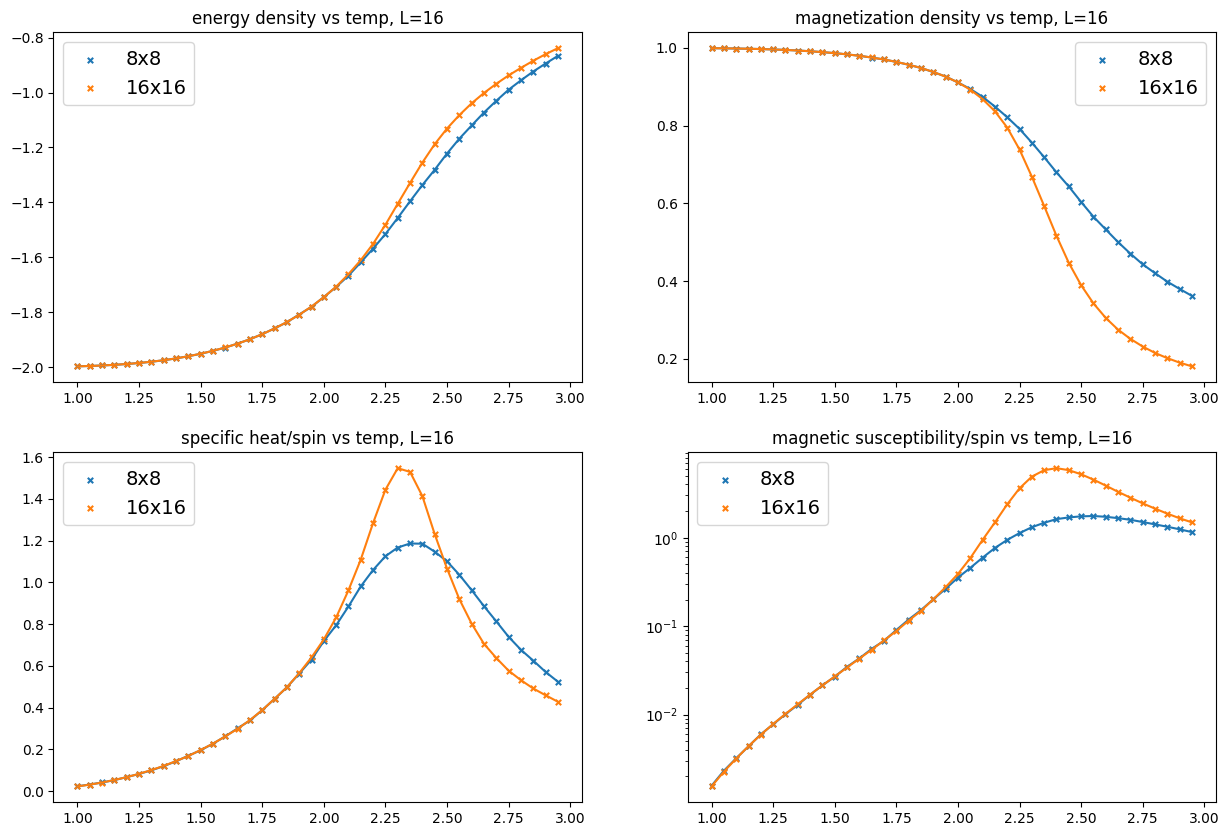

In [113]:
results_DEBUG: dict[int, RustMonteCarloData] = dict()
for L in lengths_DEBUG:
    results_DEBUG[L] = RustMonteCarloData(f"results/overview/out_{L}x{L}_DEBUG.txt")
temps = results_DEBUG[lengths_DEBUG[0]].temperatures

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2,figsize=(15,10))
for (L, result) in results_DEBUG.items():

    ax1.scatter(temps, result.energy_density, s=15, marker= 'x', label=f"{L}x{L}")
    ax1.plot(temps, result.energy_density)#, label="Rust" )
    ax1.set_title(f"energy density vs temp, L={L}")
    ax1.legend(loc="upper left",fontsize=14)

    ax2.scatter(temps, result.magnetisation, s=15, marker= 'x', label=f"{L}x{L}")
    ax2.plot(temps, result.magnetisation)#, label="Rust")
    ax2.set_title(f"magnetization density vs temp, L={L}")
    ax2.legend(loc="upper right",fontsize=14)

    ax3.scatter(temps, result.specific_heat, s=15, marker= 'x', label=f"{L}x{L}")
    ax3.plot(temps, result.specific_heat)#, label="Rust")
    ax3.set_title(f"specific heat/spin vs temp, L={L}")
    ax3.legend(loc="upper left",fontsize=14)

    ax4.scatter(temps, result.mag_susceptibility, s=15, marker= 'x', label=f"{L}x{L}")
    ax4.semilogy(temps, result.mag_susceptibility)
    ax4.set_title(f"magnetic susceptibility/spin vs temp, L={L}")
    ax4.legend(loc="upper left",fontsize=14)

Load & plot from file:

In [ ]:
my_lengths      = [8, 16, 32, 64, 128]
results: dict[int, RustMonteCarloData] = dict()

for L in my_lengths:
    results[L] = RustMonteCarloData(f"results/overview/out_{L}x{L}.txt")

    print(f"elapsed time for size {L}x{L}: {results[L].elapsed_time/60:.3}min ({results[L].elapsed_time}s)")

print("Assert: all use the same temperatures.")
for res1 in results.values():
    for res2 in results.values():
        if res1 is not res2:
            have_same_temp = np.all(res1.temperatures == res2.temperatures)
            assert(have_same_temp)

temps = results[lengths[0]].temperatures

elapsed time for size 8x8: 0.75min (45.0s)
elapsed time for size 16x16: 3.42min (205.0s)
Assert: all use the same temperatures:


### Plot!

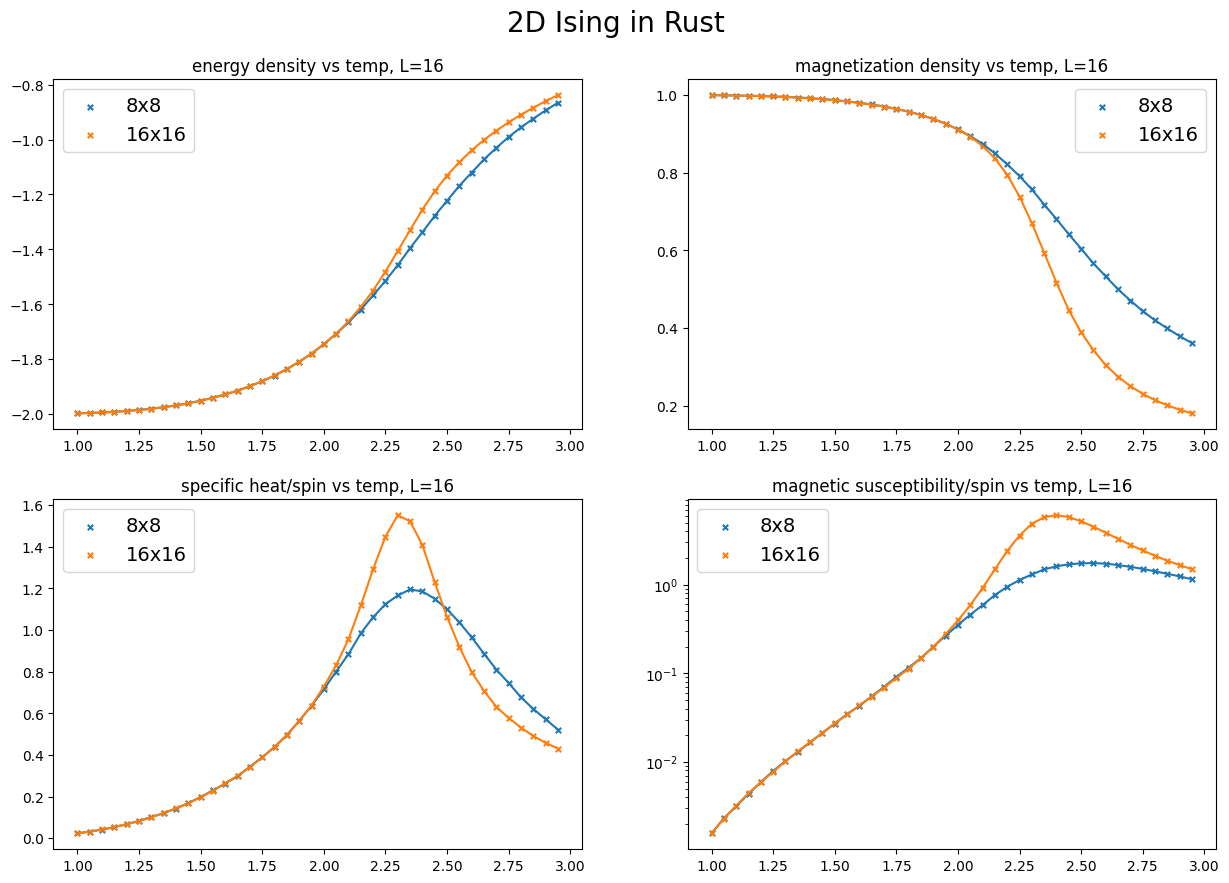

In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2,figsize=(15,10))

fig.suptitle(f"2D Ising in Rust", y=0.95, fontsize=20)
for (L, result) in results.items():

    ax1.scatter(temps, result.energy_density, s=15, marker= 'x', label=f"{L}x{L}")
    ax1.plot(temps, result.energy_density)#, label="Rust" )
    ax1.set_title(f"energy density vs temp, L={L}")
    ax1.legend(loc="upper left",fontsize=14)

    ax2.scatter(temps, result.magnetisation, s=15, marker= 'x', label=f"{L}x{L}")
    ax2.plot(temps, result.magnetisation)#, label="Rust")
    ax2.set_title(f"magnetization density vs temp, L={L}")
    ax2.legend(loc="upper right",fontsize=14)

    ax3.scatter(temps, result.specific_heat, s=15, marker= 'x', label=f"{L}x{L}")
    ax3.plot(temps, result.specific_heat)#, label="Rust")
    ax3.set_title(f"specific heat/spin vs temp, L={L}")
    ax3.legend(loc="upper left",fontsize=14)

    ax4.scatter(temps, results.mag_susceptibility, s=15, marker= 'x', label=f"{L}x{L}")
    ax4.semilogy(temps, results.mag_susceptibility)
    ax4.set_title(f"magnetic susceptibility/spin vs temp, L={L}")
    ax4.legend(loc="upper left",fontsize=14)